In [1]:
# Importando as bibliotecas necessárias 
import pandas as pd
import numpy as np
from scipy.stats import t

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o banco de dados
df = pd.read_excel('data/data-lampadas.xlsx', header=0)
print(df.shape) # mostra as dimensões do banco de dados
df.head() # mostra as 5 primeiras linhas do banco de dados

(40, 2)


,A,B
0,684,819
1,831,907
2,859,952
3,893,994
4,922,1016


In [3]:
df.info() # mostra algumas informações básicas do banco de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       40 non-null     int64
 1   B       40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [4]:
df.describe() # mostra algumas estatísticas do banco de dados

,A,B
count,40.000000,40.000000
mean,909.650000,1018.350000
std,94.305165,96.901364
min,684.000000,819.000000
25%,857.250000,949.750000
50%,916.500000,1015.500000
75%,971.250000,1085.500000
max,1093.000000,1230.000000


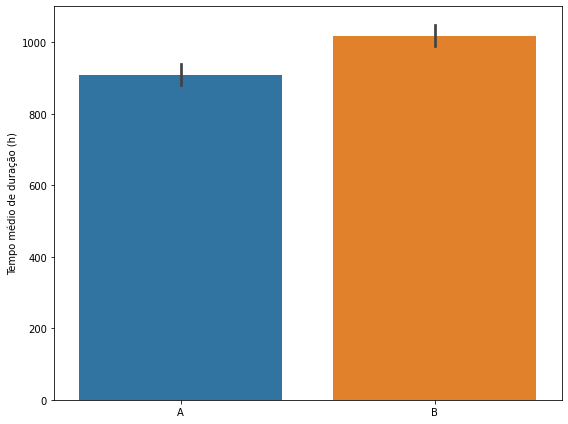

In [5]:
# Plota um gráfico de coluna com as médias e desvios padrão de A e B 
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df)
plt.ylabel('Tempo médio de duração (h)')
plt.tight_layout()

plt.savefig('figuras/tempo_medio.png')
plt.show()

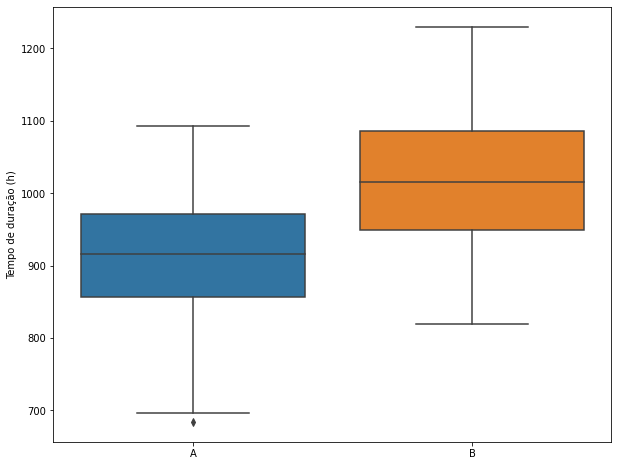

In [6]:
# Plota o boxplot dos dados

fig, ax = plt.subplots(figsize=(10,8))

sns.boxplot(data=df)

plt.ylabel('Tempo de duração (h)')  

plt.savefig('figuras/boxplot.png')

plt.show()

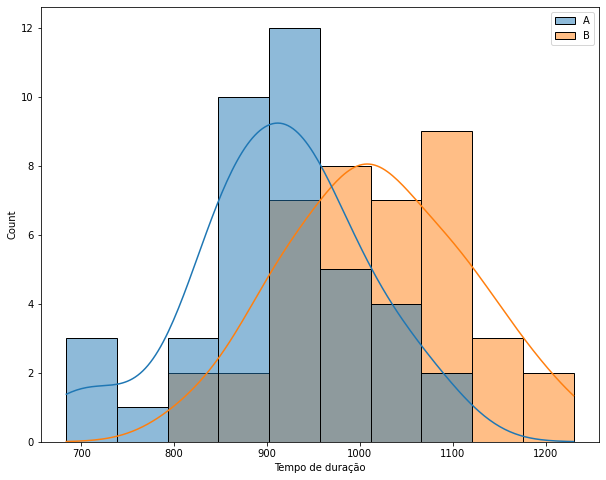

In [7]:
# Plota o histograma dos dados
fig, ax = plt.subplots(figsize=(10,8))

sns.histplot(df, kde=True)

ax.set_xlabel('Tempo de duração')

plt.savefig('figuras/hist.png')
plt.show()

In [32]:
# Função para cálculo do intervalo de confiança
def IC(df, C):
    # recebemos os dados e o nível de confiança que desejamos
    media = df.mean(axis=0) # média 
    std = df.std(axis=0) # desvio padrão
    dof = len(df)-1 # graus de liberdade
    t_crit = np.abs(t.ppf((1-C)/2,dof)) # cálculo do t crítico
    
    intervalo_inf = round(media-std*t_crit/np.sqrt(len(df)),2)
    intervalo_sup = round(media+std*t_crit/np.sqrt(len(df)),2)
                                                  
    return intervalo_inf, intervalo_sup # intervalos de confiança
    

In [33]:
# Para as lâmpadas A
IC(df['A'], 0.95)

(879.49, 939.81)

In [34]:
# Para as lâmpadas B
IC(df['B'], 0.95)

(987.36, 1049.34)